In [14]:
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
import time
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('dimensionality_reduction_data.csv')

To understand the utility of kernel PCA, particularly for clustering, observe that, while N points cannot in general be linearly separated in d<N dimensions, they can almost always be linearly separated in d>=N dimensions. 

Kernel PCA has been demonstrated to be useful for novelty detection and image de-noising.

KPCA reduces dimensions while also making the data linearly separable. PCA only reduces dimensions

source: https://en.wikipedia.org/wiki/Kernel_principal_component_analysis

In [5]:
data.shape

(78025, 19)

In [6]:
time_start = time.time()
kpca = KernelPCA(kernel="poly", n_components=2)

In [7]:
kpca_data = data.head(5000)

In [8]:
kpca_result = kpca.fit_transform(kpca_data)
print('KPCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

KPCA done! Time elapsed: 19.600359678268433 seconds


In [10]:
kpca_data['kpca-one'] = kpca_result[:,0]
kpca_data['kpca-two'] = kpca_result[:,1]

C:\Users\skype\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\skype\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


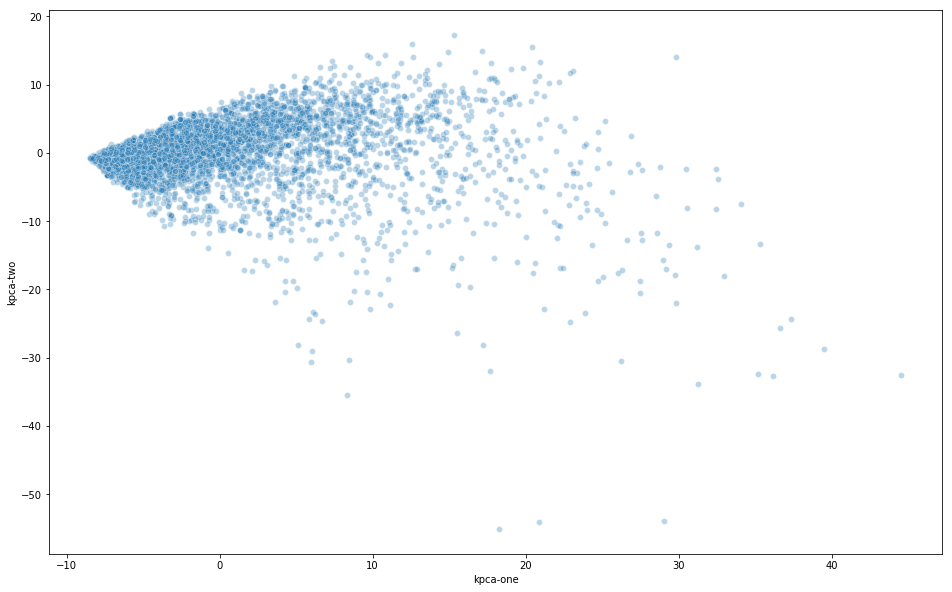

In [16]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="kpca-one", y="kpca-two",
    palette=sns.color_palette("hls", 10),
    data=kpca_data,
    legend="full",
    alpha=0.3
)